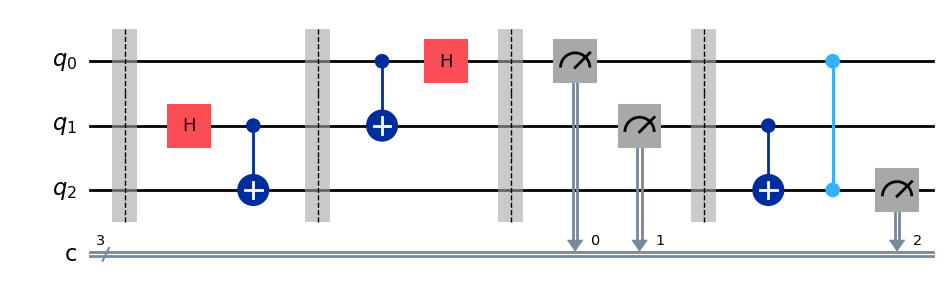

In [1]:
import qiskit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3,3)

# circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

circuit.measure([0,1],[0,1])
circuit.barrier()

circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure([2],[2])

circuit.draw(output='mpl')

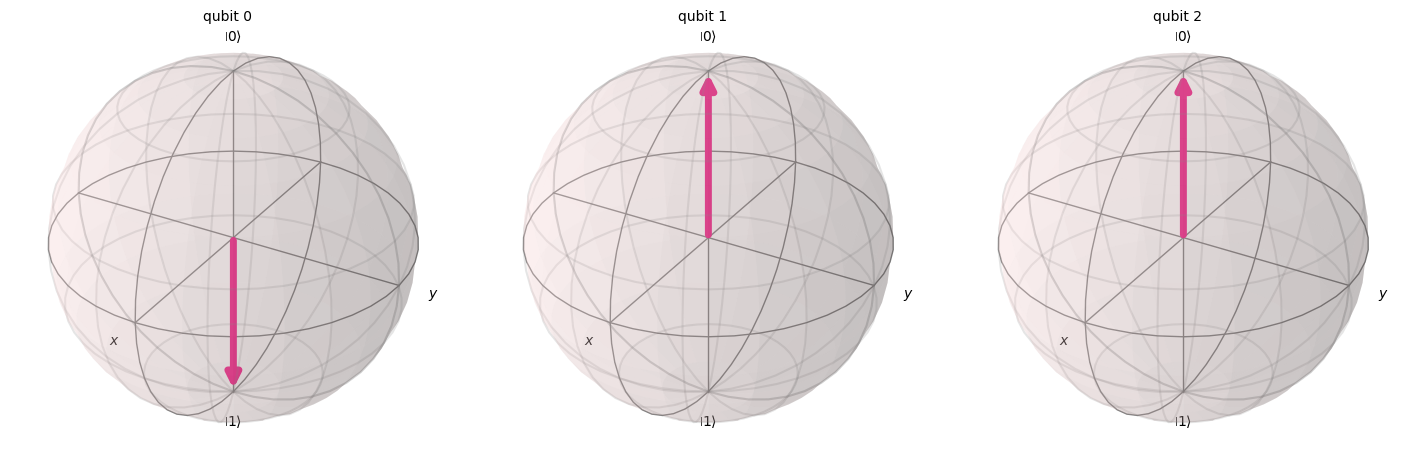

In [2]:
simulator = Aer.get_backend('statevector_simulator')

compiled_circuit = qiskit.transpile(circuit, backend=simulator)
compiled_circuit.measure_all() 
result = simulator.run(compiled_circuit, shots=1024).result()

statevector = simulator.run(circuit).result().get_statevector()
plot_bloch_multivector(statevector)